In [4]:
#Daniel Hedji
#V00887395

In [4]:
#constants
Re = 1.496e11 #in m
Rj = 7.784e11 #in m
Mj = 1.90e27 #in kg
G1 = 6.67e-11 #in Nm^2/kg^2

In [70]:
import matplotlib.pyplot as plt
from sympy import *
init_printing(pretty_print=True)

In [6]:
x, r, R, theta, mu, G, M, g = symbols('x r R theta mu G M g')
n = symbols('n', integer=True)
f, genfun, phi = symbols('f genfun phi', cls=Function)

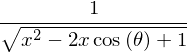

In [7]:
genfun = 1/sqrt(1+x**2-2*x*cos(theta))
genfun

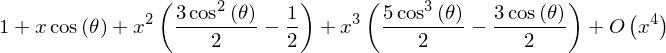

In [8]:
genfun.series(x,0,4)

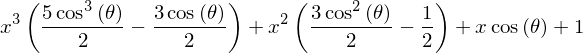

In [9]:
getfunc_trunc = (genfun.series(x,0,4)).removeO()
getfunc_trunc

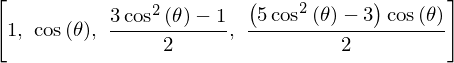

In [10]:
coeff = [getfunc_trunc.coeff(x,i).factor() for i in range(4)]
coeff

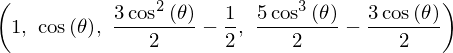

In [11]:
legendre(0,cos(theta)), legendre(1,cos(theta)),\
legendre(2,cos(theta)), legendre(3,cos(theta))

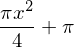

In [12]:
integral = integrate(getfunc_trunc, (theta,0,pi))
integral

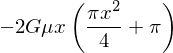

In [13]:
phi = -2*x*mu*G*integral
phi

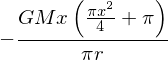

In [14]:
f = phi.subs({mu:M/(2*pi*r)})
f

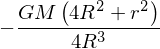

In [15]:
g = (f.subs({x:(r/R)})).simplify()
g

In [16]:
#b
#approximating phi by taking the first two terms
# phi = (-G * Mj / Rj) * (1 + Re ** 2 / (4 * Rj ** 2))
gJE = (g.subs({G:G1, M:Mj, R:Rj, r:Re}))
print("The average gravitational potential that Jupiter exerts " \
     "on Earth is approximately:",format(gJE,",.3f"), "Joules")

The average gravitational potential that Jupiter exerts on Earth is approximately: -164,311.723 Joules


In [129]:
#c
count = 0
diff = 1e-2
phi2 = 0
potential = 0

for i in range(1,25):
    phi1 = phix(2 ** i,Mj / 2 ** i,G1,Rj,Re)
    if abs(phi1 - phi2) <= diff:
        count = 2**i
        potential = phi1
        break
        
    else:
        phi2 = phi1
        
print("The potential was found to be", potential)
print("The potential in c) has a difference of", gJE - potential, \
      "J when compared to the potential found in b")
print("The number of masses needed to reach the potential is:", count)

The potential was found to be -164343.79162667447
The potential in c) has a difference of 32.0682325356756 J when compared to the potential found in b
The number of masses needed to reach the potential is: 8388608


In [119]:
import numpy as np
def phix(N,M,G,R,r):
    n_div = int(N/2)
    coef = -2 * G * M / R
    x = r / R
    j = 0
    val = []
    while j < n_div:
        alpha = j * 2 * np.pi / N
        summ = (1 + x ** 2 - 2 * x * np.cos(alpha)) ** -0.5
        val.append(coef * summ)
        j += 1
    return sum(val)

In [ ]:
#constants
Re = 1.496e11 #in m
Rj = 7.784e11 #in m
Mj = 1.90e27 #in kg
G1 = 6.67e-11 #in Nm^2/kg^2

In [122]:
#d
def potential1(r,M,G,R):
    count = 0
    diff = 1e-2
    phi2 = 0
    potential = 0

    for i in range(1,25):
        phi1 = phix(2 ** i,M / 2 ** i,G,R,r)
        if abs(phi1 - phi2) <= diff:
            count = 2**i
            potential = phi1
            break
        
        else:
            phi2 = phi1
    return potential

In [123]:
r1 = [0,0.2,0.4,0.6,0.8]
r = [0 * Re,0.2 * Re,0.4 * Re,0.6 * Re,0.8 * Re]
pot = []
for t in r:
    potens = potential1(t,Mj,G1,Rj)
    pot.append(potens)

In [124]:
difference = []
for q in pot:
    difference.append(-q + potential)
difference

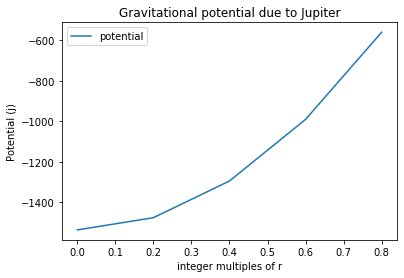

In [125]:
plt.title("Gravitational potential due to Jupiter")
plt.xlabel("integer multiples of r")
plt.ylabel("Potential (j)")
plt.plot(r1,difference, label = "potential")
plt.legend()